In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#Load the data sets 
df=pd.read_csv('Train.csv')

In [3]:
#Find Total Rows and columns 
df.shape

(16000, 7)

In [4]:
#Datasets look at a glance  
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [5]:
#Drop Duplicate Value 
df=df.drop_duplicates()
df.shape

(15999, 7)

In [6]:
#UDF function to find missing value 
def miss_val(data):
    return data.isnull().sum()/len(data)*100

In [7]:
miss_val(df)

ACTIVITY       0.0
TIME           0.0
SL             0.0
EEG            0.0
BP             0.0
HR             0.0
CIRCLUATION    0.0
dtype: float64

In [8]:
#Find Out Data Types 
df.dtypes

ACTIVITY         int64
TIME           float64
SL             float64
EEG            float64
BP               int64
HR               int64
CIRCLUATION      int64
dtype: object

In [9]:
#Statical value at a glance 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACTIVITY,15999.0,2.363960,1.739176,0.000000e+00,0.000,3.00,4.00,5.0
TIME,15999.0,10928.525139,5256.671745,1.954230e+03,7261.655,9767.79,13465.55,50895.5
SL,15999.0,75010.668211,126598.586113,4.222420e+01,9894.540,30976.70,80634.40,2426140.0
EEG,15999.0,-5649.135702,109507.162490,-1.262600e+07,-5629.010,-3360.00,-2147.65,1410000.0
BP,15999.0,58.247515,48.219037,0.000000e+00,25.000,44.00,78.00,533.0
HR,15999.0,211.359335,129.718827,3.300000e+01,119.000,180.00,271.00,981.0
CIRCLUATION,15999.0,2886.781674,3802.365106,5.000000e+00,587.000,1581.00,3539.00,52210.0


Trying to find,Out what activity happend before fall,So we shorted TIME varibale and make one new DataFrame 

In [10]:
#Shorting the Time Variable with ascending order  
df.sort_values("TIME", axis = 0, ascending = True, 
                 inplace = True, na_position ='first') 
df.reset_index(drop=True)
df.shape

(15999, 7)

#Creating one data frame which have three columns ['Before','Fall','After']

Before -->Activity Before fall,
Fall-->Activty on Fall,
Aftre-->Activity After fall

In [11]:
#Creating One new DataFrame to find out what activity happend before fall.
list1=[]
for i,j in enumerate(df['ACTIVITY']):
    if j==3:
        list1.append((df.iloc[i-1][0],df.iloc[i][0],df.iloc[i+1][0]))
df1=pd.DataFrame(list1,columns=['Before','Fall','After'])

In [12]:
df1.head()

,Before,Fall,After
0,2.0,3.0,2.0
1,5.0,3.0,4.0
2,1.0,3.0,2.0
3,1.0,3.0,4.0
4,4.0,3.0,1.0


In [13]:
#Activity before Fall
df1['Before'].value_counts()/len(df1)*100

0.0    28.538813
3.0    24.200913
4.0    21.347032
2.0    13.670091
5.0     9.760274
1.0     2.482877
Name: Before, dtype: float64

In [14]:
#Activity After Fall
df1['After'].value_counts()/len(df1)*100

0.0    28.082192
3.0    24.200913
4.0    21.461187
2.0    13.984018
5.0     9.960046
1.0     2.311644
Name: After, dtype: float64

In [15]:
#Droping TIME variable 
df=df.drop(['TIME'],axis=1)

In [16]:
#Find Out the OutLayer, I used IQR method .
outliers=[]
def detect_outlier1(data_1):
    iqr=data_1.quantile(0.75)-data_1.quantile(0.25)
    lo=data_1.quantile(0.25)-1.5*iqr
    uo=data_1.quantile(0.75)+1.5*iqr
    for y in data_1:
        if y>uo or y<lo:
            outliers.append(y)
    return outliers

In [17]:
df.columns

Index(['ACTIVITY', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object')

In [18]:
#Find out the Upper,Lower Out Layer Value  
def iqr_vlue(data):
    
    iqr=data.quantile(0.75)-data.quantile(0.25)
    lo=data.quantile(0.25)-1.5*iqr
    uo=data.quantile(0.75)+1.5*iqr
    data_min=data.min()
    data_max=data.max()
    return lo,data_min,uo,data_max

#All the value which higher then the Upper out layer value replace with uo and Lower side value replace with lo.

In [19]:
iqr_vlue(df['SL'])

(-96215.24999999997, 42.2242, 186744.18999999997, 2426140.0)

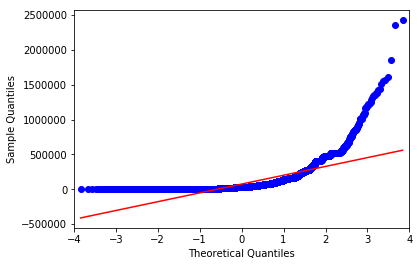

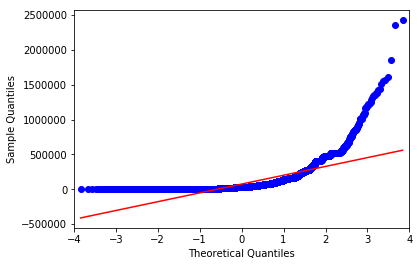

In [20]:
#qq plot method to show outlaiers 
from statsmodels.graphics.gofplots import qqplot
qqplot(df['SL'],line='s')

In [21]:
#In 'SL' Variable we have Upper Out Layers
df['SL']=np.where(df['SL']>iqr_vlue(df['SL'])[2],iqr_vlue(df['SL'])[2],df['SL'])

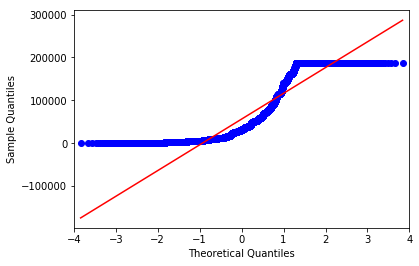

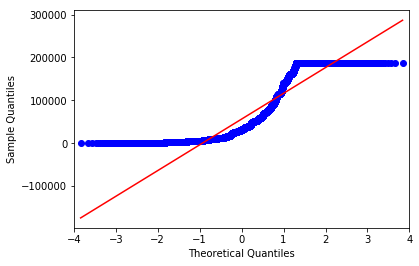

In [22]:
qqplot(df['SL'],line='s')

In [23]:
iqr_vlue(df['EEG'])

(-10851.050000000001, -12626000.0, 3074.3900000000012, 1410000.0)

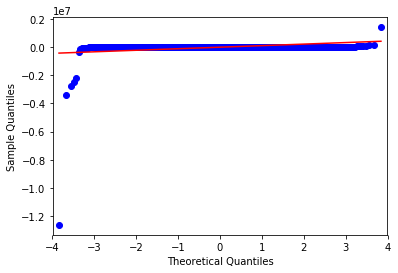

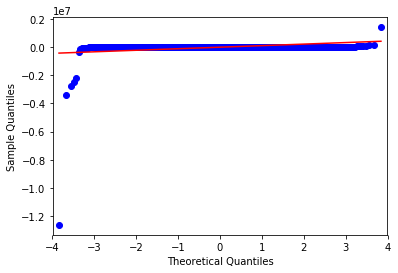

In [24]:
qqplot(df['EEG'],line='s')

In [25]:
#In 'EEG', WE have upper and lower Out layers .
df['EEG']=np.where(df['EEG']>iqr_vlue(df['EEG'])[2],iqr_vlue(df['EEG'])[2],df['EEG'])
df['EEG']=np.where(df['EEG']<iqr_vlue(df['EEG'])[0],iqr_vlue(df['EEG'])[0],df['EEG'])

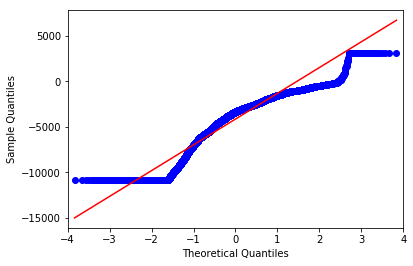

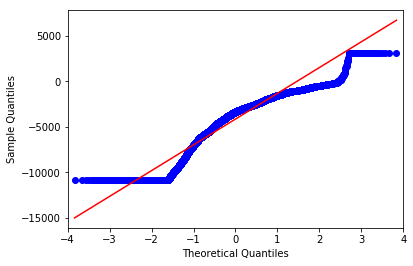

In [26]:
qqplot(df['EEG'],line='s')

In [27]:
iqr_vlue(df['BP'])

(-54.5, 0, 157.5, 533)

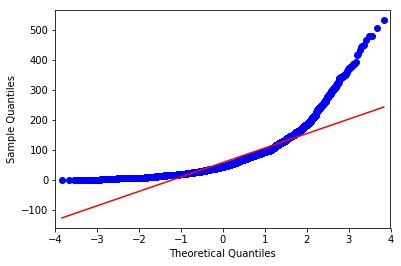

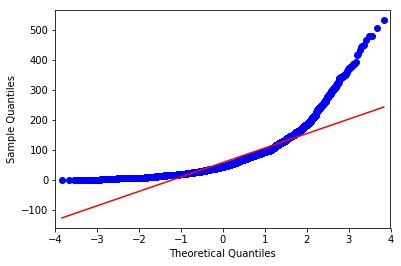

In [28]:
qqplot(df['BP'],line='s')

In [29]:
#In BP we have Upper Out layers 
df['BP']=np.where(df['BP']>iqr_vlue(df['BP'])[2],iqr_vlue(df['BP'])[2],df['BP'])

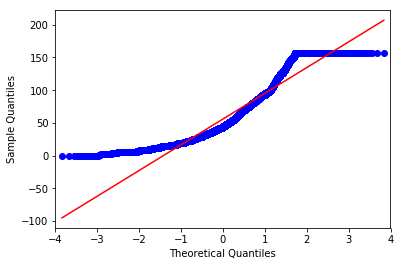

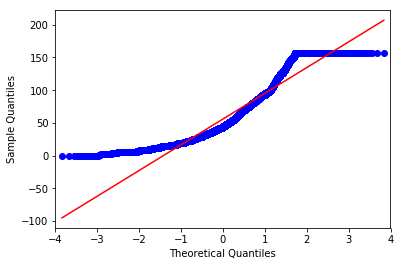

In [30]:
qqplot(df['BP'],line='s')

In [31]:
iqr_vlue(df['HR'])

(-109.0, 33, 499.0, 981)

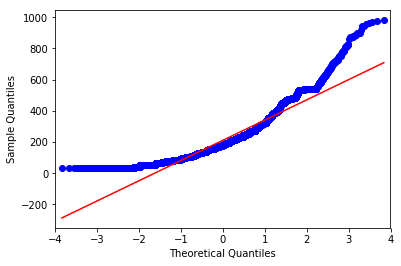

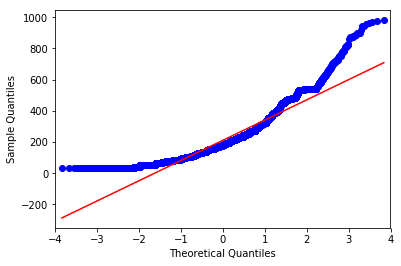

In [32]:
qqplot(df['HR'],line='s')

In [33]:
#In HR we have Upper Out layers 
df['HR']=np.where(df['HR']>iqr_vlue(df['HR'])[2],iqr_vlue(df['HR'])[2],df['HR'])

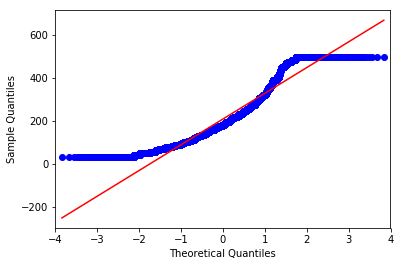

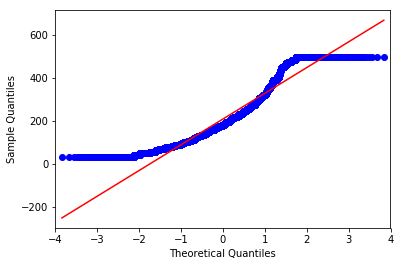

In [34]:
qqplot(df['HR'],line='s')

In [35]:
df.columns

Index(['ACTIVITY', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object')

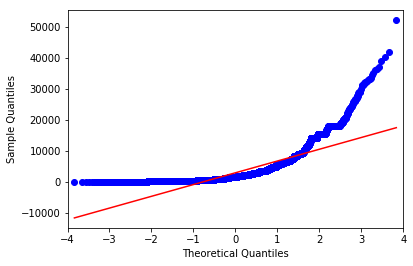

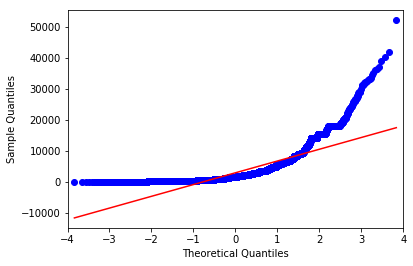

In [36]:
qqplot(df['CIRCLUATION'],line='s')

In [37]:
#In CIRCLUATION we have Upper Out layers 
df['CIRCLUATION']=np.where(df['CIRCLUATION']>iqr_vlue(df['CIRCLUATION'])[2],iqr_vlue(df['CIRCLUATION'])[2],df['CIRCLUATION'])

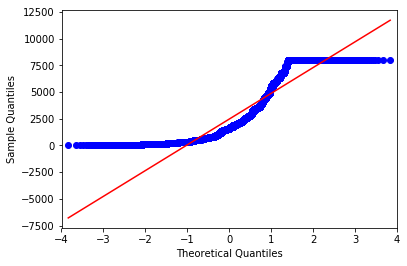

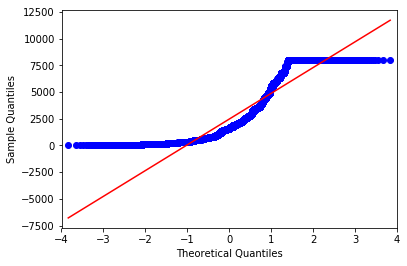

In [38]:
qqplot(df['CIRCLUATION'],line='s')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


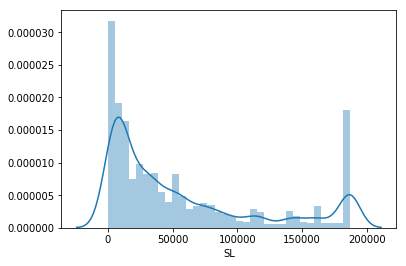

In [39]:
#Using DistPlot to check Normal distribution .
sns.distplot(df['SL'])

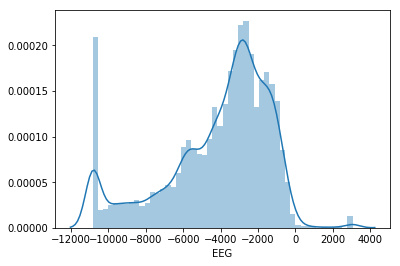

In [40]:
sns.distplot(df['EEG'])

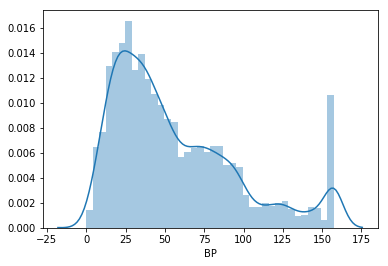

In [41]:
sns.distplot(df['BP'])

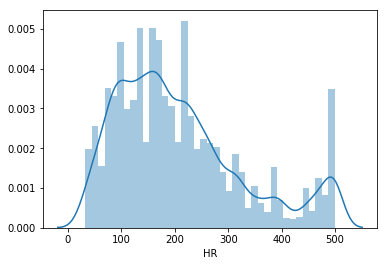

In [42]:
sns.distplot(df['HR'])

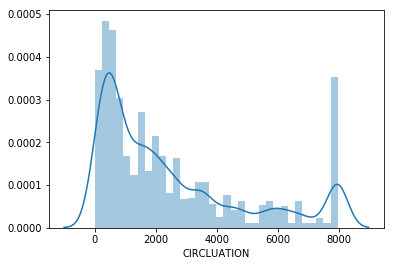

In [43]:
sns.distplot(df['CIRCLUATION'])

In [44]:
#We are going to convert "ACTIVITY" columns in 0 an 1 from 
#ACTIVITY=3 chnaged with 1 and other value  changed with 0

In [45]:
df['ACTIVITY']=np.where(df['ACTIVITY']==3,1,0)
df['ACTIVITY'].value_counts()

0    12495
1     3504
Name: ACTIVITY, dtype: int64

In [46]:
#Using MinMax Sclare for scalling data 
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df=pd.DataFrame(mn.fit_transform(df),columns=df.columns)

In [47]:
# Splitting The Data Into Training and Test
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=0)

In [48]:
#Printing size of train and test data
print(train.shape,test.shape)

(12799, 6) (3200, 6)


#Applying variable reduction techniques
1-VIF,
2-P value
3-Z Value

In [49]:
#UDF for to find out VIF Value 
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [50]:
train.columns


Index(['ACTIVITY', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object')

In [51]:
#As per the Rule VIF value should not be more then 2 so we will drop varibale one by one till its less the 2
vif_cal(train,'ACTIVITY')

SL  VIF =  68.61
EEG  VIF =  5.13
BP  VIF =  1.32
HR  VIF =  15.1
CIRCLUATION  VIF =  75.49


In [52]:
train1=train.drop(['CIRCLUATION'],axis=1)

In [53]:
vif_cal(train1,'ACTIVITY')

SL  VIF =  10.15
EEG  VIF =  5.13
BP  VIF =  1.32
HR  VIF =  14.11


In [54]:
train1=train1.drop(['HR'],axis=1)

In [55]:
vif_cal(train1,'ACTIVITY')

SL  VIF =  3.67
EEG  VIF =  3.82
BP  VIF =  1.31


In [56]:
#We are using three parameters SL EEG and BP to build the modle 
print(test.columns,train1.columns)

Index(['ACTIVITY', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object') Index(['ACTIVITY', 'SL', 'EEG', 'BP'], dtype='object')


In [57]:
#On test dataset we are droping HR and CIRCLUATION  
test.drop(['HR','CIRCLUATION'],axis=1)

,ACTIVITY,SL,EEG,BP
8833,0.0,0.180110,0.531328,0.539683
223,1.0,0.000053,0.792869,0.584127
15839,0.0,1.000000,0.000000,0.488889
6321,1.0,0.147236,0.604724,0.241270
14912,0.0,0.857585,0.159496,0.590476
15686,1.0,1.000000,0.000000,0.285714
13108,0.0,0.882957,0.183409,1.000000
5682,1.0,0.065481,0.578101,0.590476
14250,1.0,0.864896,0.940082,0.520635
1113,0.0,0.008130,0.665723,0.088889


In [58]:
train1.columns

Index(['ACTIVITY', 'SL', 'EEG', 'BP'], dtype='object')

In [59]:
train_x=train1.drop(['ACTIVITY'],axis=1)
train_y=train1['ACTIVITY']

In [60]:
test=test.drop(['HR','CIRCLUATION'],axis=1)

In [61]:
test_x=test.drop(['ACTIVITY'],axis=1)
test_y=test['ACTIVITY']

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)

0.8678803031486835

In [63]:
#Find out Accuracy on Test data sets 
knn.score(test_x,test_y)

0.81375

In [64]:
#Predict the value on train data sets 
train['Pred']=knn.predict(train_x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
train.head()

,ACTIVITY,SL,EEG,BP,HR,CIRCLUATION,Pred
9473,0.0,0.203991,0.484622,0.634921,0.369099,0.219292,0.0
11916,1.0,0.324498,0.551584,0.266667,0.459227,0.345265,0.0
12975,0.0,0.604111,0.143697,0.380952,0.654506,0.592565,0.0
5242,0.0,0.050819,0.565388,0.615873,0.208155,0.060914,0.0
10750,1.0,0.322150,0.386419,0.152381,0.459227,0.345265,0.0


In [66]:
#Predict the value on test data sets 
test['Pred']=knn.predict(test_x)

In [67]:
#Find OUt the accuracy using sklearn metod on train
from sklearn.metrics import accuracy_score
print ("Accuracy on train data sets ",accuracy_score(train['ACTIVITY'],train['Pred']))
print ("Accuracy on test data sets ",accuracy_score(test['ACTIVITY'],test['Pred']))


Accuracy on train data sets  0.8678803031486835
Accuracy on test data sets  0.81375


In [68]:
from sklearn.metrics import recall_score
print("train data ***",recall_score(train["ACTIVITY"],train["Pred"]))
print("test data ***",recall_score(test["ACTIVITY"],test["Pred"]))


train data *** 0.5085287846481876
test data *** 0.37971014492753624


In [69]:
#finding out precision,recall and fscore on train data sets  
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support=score(train["ACTIVITY"],train["Pred"])
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.87495479 0.82288672]
recall: [0.96915373 0.50852878]
fscore: [0.91964837 0.62859653]


In [70]:
#finding out precision,recall and fscore on test data sets  
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support=score(test["ACTIVITY"],test["Pred"])
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.84548736 0.60930233]
recall: [0.93306773 0.37971014]
fscore: [0.88712121 0.46785714]


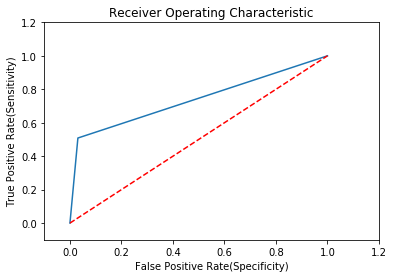

0.7388412576220408

In [71]:
######ROC AND AUC Traning data sets#########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = train[['ACTIVITY']]
predicted_values1=train[["Pred"]]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [72]:
#Confusion metrics of train data sets 
from sklearn.metrics import confusion_matrix
confusion_matrix(train["ACTIVITY"],train["Pred"])

array([[9677,  308],
       [1383, 1431]], dtype=int64)

In [73]:
#Confusion metrics of test data sets 
from sklearn.metrics import confusion_matrix
confusion_matrix(test["ACTIVITY"],test["Pred"])

array([[2342,  168],
       [ 428,  262]], dtype=int64)

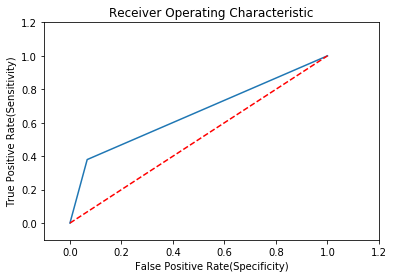

0.6563889370056007

In [75]:
######ROC AND AUC Test data sets#########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = test[['ACTIVITY']]
predicted_values1=test[["Pred"]]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [87]:
#Importing the new data sets for validation 
abc=pd.read_csv('test.csv')

In [88]:
#Using MinMax Sclare for scalling data 
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
abc=pd.DataFrame(mn.fit_transform(abc),columns=abc.columns)

In [90]:
abc['Pred']=knn.predict(abc.drop(['HR','CIRCLUATION','TIME'],axis=1))

In [91]:
abc['Pred'].value_counts()

0.0    345
1.0     37
Name: Pred, dtype: int64